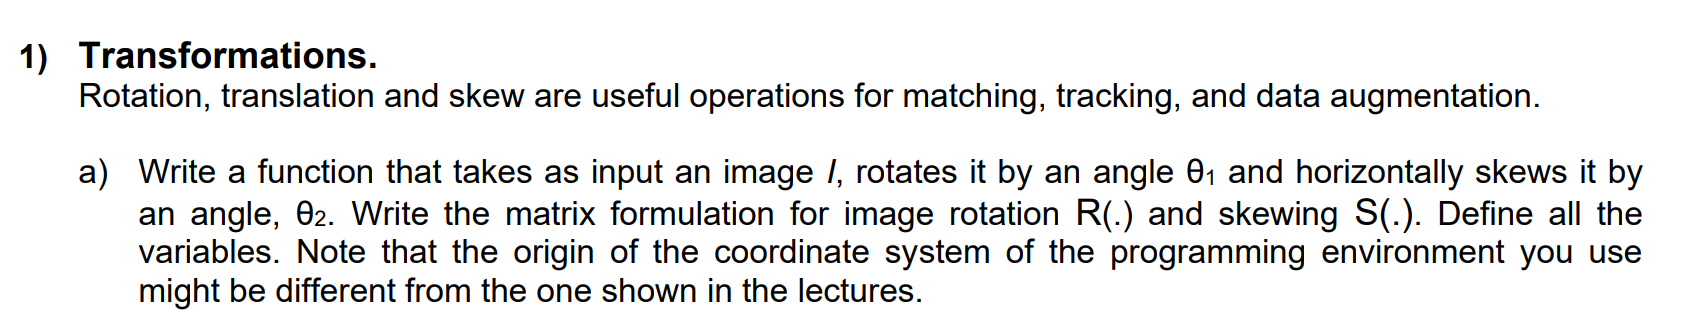

In [85]:
# import required packeges (PIL and Image ONLY used for read and write the results)
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt
import os

In [86]:
# uncomment below line for give path of image from user
# path = input("Enter the Image path\n")
# define the path of input image
path = "Dataset//DatasetA//face-1.jpg"
#open image as an np array
image = np.array(Image.open(path))
# getting angles for rotation and skewness from user
theta_1, theta_2 = map(lambda s: int(s), input("Enter the angles for rotation and skewness : ").split())

Enter the angles for rotation and skewness : 80 30 


In [87]:
# convert given angel to radians, calculate and return trigonometry parameters
def calculate_trigonometry_params(theta):
    theta = math.radians(theta)
    return math.sin(theta), math.cos(theta), math.tan(theta)

In [88]:
# skewing (counterclockwise) input image with theta angle and return the result
def skew(image, theta):
    # since the dimension of image changes after skewness, we define new dimensions for output
    # since it is horizontal skewness the height remains same
    new_height  = image.shape[0]
    tan = math.tan(math.radians(theta))
    # calculating new width for the output (since the values in x-axis will shift)
    new_width  = round(abs(image.shape[1])+abs(image.shape[0]/tan))+1
    #creating output grid based on new dimensions
    output = np.zeros((new_height,new_width,image.shape[2]))
    
    #filling the output grid with new x-values
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):

            old_x = round(j - (i/tan))
            old_y = i
            
            if 0<old_x<image.shape[1] and 0<old_y<image.shape[1]:

                output[i,j,:]=image[old_y,old_x,:]   
    return output


In [89]:
#rotating (clockwise) the given image for angle theta and return the result (using inverse mapping method)
def rotate (image, theta):
    # assigining width, height, number of channels to variables
    x, y, channels = image.shape[1], image.shape[0], image.shape[2]
    # calculate trigonometry parameters for the given angle
    sin, cos, _ = calculate_trigonometry_params(theta)
    # calculating the rotation matrix
    rotation_matrix =  np.array([[cos, -sin],
                            [sin, cos]])
    # inverse the rotation matrix since we want to use inverse mapping
    inverse_rotation_matrix = rotation_matrix.T
    # since by using rotation the dimensions of original image changes we should calculate new height and width values for
    # the output which are calculated using the same formula as rotation for the points
    new_height  = round(abs(y * cos) + abs(x * sin))+1
    new_width  = round(abs(x * cos) + abs(y * sin))+1
    
    # defining output grid based on calculated dimensions
    output = np.zeros((new_height, new_width, channels))
    # calculating the centers of the both original and rotated grids since it is the only point that we know its exact place in the new grid
    # we place other points with respect to the center point
    original_center_point = [round(((image.shape[1]+1)/2)-1), round(((image.shape[0]+1)/2)-1)] #x, y = width, height
    new_center_point = [round(((new_width+1)/2)-1) , round(((new_height+1)/2)-1)]
    
    # to avoid having gaps in the new grid (because of rounding operation for finding coordinates in the new grid)
    # we iterate through new grid points and find its original pixel value for the original grid using inverse mapping method
    for i in range(new_height):
        for j in range(new_width):
            
            # in the new grid we convert the coordinates of the points with respect to the center
            y = i - new_center_point[1] +1                   
            x = j - new_center_point[0] +1
            # we find the value of coordinates in the original grid with respect to its center point
            # using inverse mapping formula
            original_x = (int(inverse_rotation_matrix[0,0] * x + inverse_rotation_matrix[0,1] * y))
            original_y = (int(inverse_rotation_matrix[1,0] * x + inverse_rotation_matrix[1,1] * y))
            
            # we change the origin of the coordinates to pixel(0,0) in the orignial grid 
            new_y = original_center_point[1] + original_y
            new_x = original_center_point[0] + original_x
            # we copy the corresponding value from original image to the new grid (while checking that the coordinates
            # values are in the grid dimensions)
            if new_x < image.shape[1] and new_y < image.shape[0] and new_x>=0 and new_y>=0:
                output[i, j, :] = image[new_y, new_x, :]
    
    return output

In [90]:
# returns rotate, skew, rotate and skew, skew and rotate for an input image with given angels theta_1, theta_2
def rotate_and_skew (image, theta_rotate, theta_skew):
    #rotate
    output = rotate (image, theta_rotate) 
    #skew
    output2 = skew(image, theta_skew)
    #rotate and skew
    output3 = skew(output, theta_skew)
    #skew and rotate
    output_4 = rotate(output2, theta_rotate)
    
    return output, output2, output3, output_4

In [91]:
# calculating rotate and skew for the given image and save it in images folder
results = rotate_and_skew(image, theta_1, theta_2)
labels = ["rotated by {}".format(theta_1), "skewed by {}".format(theta_2),
          "rotated and skewed by {} {}".format(theta_1,theta_2)]

results = list(map(lambda image:Image.fromarray((image).astype(np.uint8)), results[0:3]))

directory = "images"
if not os.path.exists(directory):
        # If not, create the directory
        os.makedirs(directory)

for i in range(len(results)):
    results[i].save("images/"+labels[i] + ".png")
# print(results)

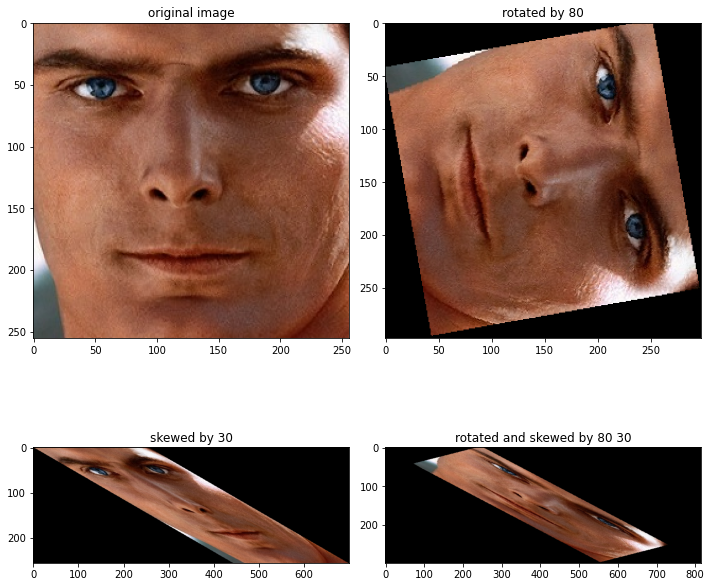

In [92]:
# plotting the results of the previous cell
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0,0].imshow(image)
axes[0,0].set_title('original image')

axes[0,1].imshow(results[0])
axes[0,1].set_title(labels[0])

axes[1,0].imshow(results[1])
axes[1,0].set_title(labels[1])

axes[1,1].imshow(results[2])
axes[1,1].set_title(labels[2])

plt.tight_layout()
plt.show()

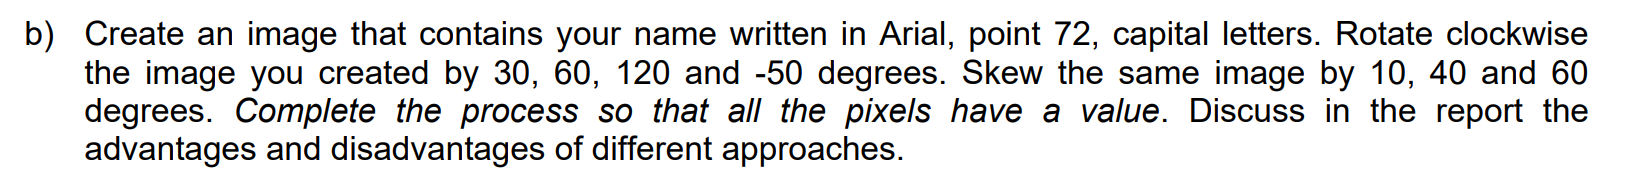

In [93]:
#plot and save a list of images with their labels in the given folder name
def print_result_list(results_list, labels, folder_name):
    directory = folder_name
    if not os.path.exists(directory):
        # If not, create the directory
        os.makedirs(directory)
        
    for i in range(len(results_list)):
        results_list[i].save(folder_name + "/{}.png".format(i))

    fig, axes = plt.subplots(len(results_list), 1, figsize=(10, 10))

    for i in range(len(results_list)):

        axes[i].imshow(results_list[i])
        
        if labels:
            axes[i].set_title("{}".format(labels[i]))

    plt.tight_layout()
    plt.show()

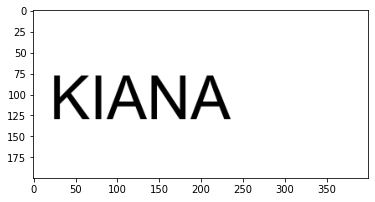

In [94]:
# opening the image of my name as np array
name_image = np.array(Image.open("name_image.png"))

plt.imshow(name_image)

In [95]:
#calculating rotate, skew, rotate and skew for the combinations of rotates and skews angle
rotate_angles = [30, 60, 120, -50]
skew_angles = [10, 40, 60]

results = []
rotates = []
skews = []


for i in rotate_angles:
    for j in skew_angles:
        all_outputs = rotate_and_skew(name_image, i, j)
        results.append(Image.fromarray((all_outputs[2]).astype(np.uint8)))
        
for i in rotate_angles:
    rotates.append(Image.fromarray((rotate(name_image, i)).astype(np.uint8)))
        
for j in skew_angles:    
    skews.append(Image.fromarray((skew(name_image, j)).astype(np.uint8)))

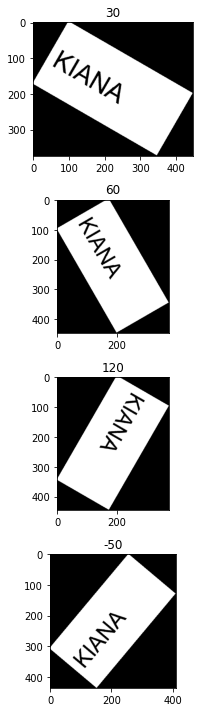

In [96]:
#plot rotates results and save them
print_result_list(rotates, rotate_angles, "Rotates")

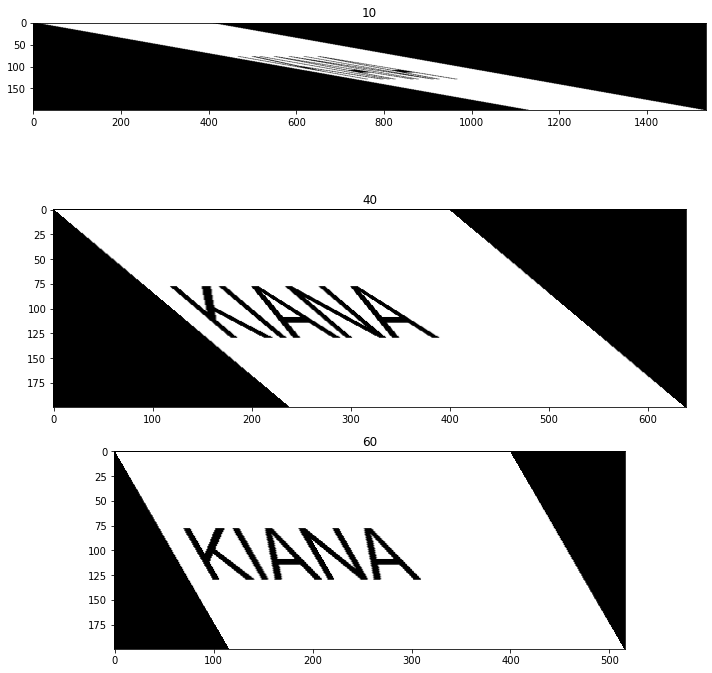

In [97]:
#plot skews results and save them
print_result_list(skews, skew_angles, "Skews")

In [98]:
# # plot and save rotate_and_skewed images
# directory = "Rotate_and_Skewed"
# if not os.path.exists(directory):
#     # If not, create the directory
#     os.makedirs(directory)

# for i in range(len(results)):
#     results[i].save("Rotate_and_Skewed/{}.png".format(i))

# fig, axes = plt.subplots(4, 3, figsize=(20, 15))
# k = 0
# for i in range(4):
#     for j in range(3):
#         axes[i,j].imshow(results[k])
#         axes[i,j].set_title("r={} s={}".format(rotate_angles[i],skew_angles[j]))
#         k += 1

# plt.tight_layout()
# plt.show()

In [99]:
# plt.imshow(results[4])

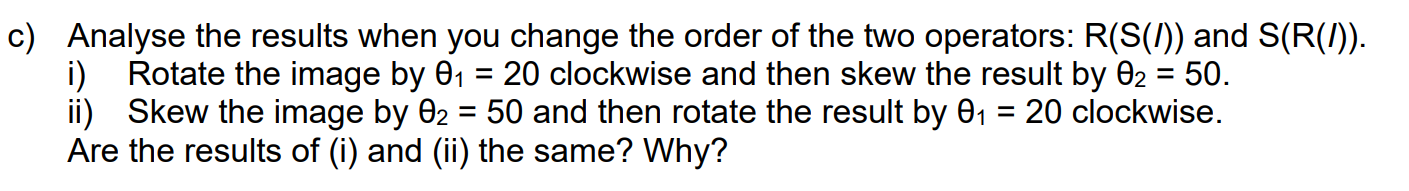

In [100]:
# using rotate_and_skew function to calculate answers of part i and ii at once
# its output is rotate, skew, rotate and skew, skew and rotate of the given image
results = rotate_and_skew(name_image,20, 50)
print(len(results))

4


In [101]:
results = list(map(lambda image:Image.fromarray((image).astype(np.uint8)), results))

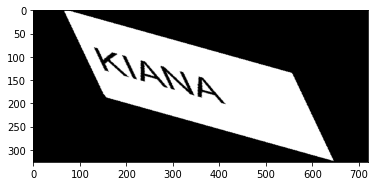

In [102]:
# plot rotate and skew
plt.imshow(results[2])

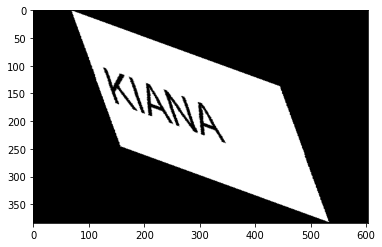

In [103]:
#plot skew and rotate
plt.imshow(results[3])

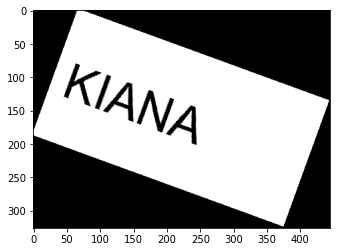

In [104]:
# plot rotate
plt.imshow(results[0])

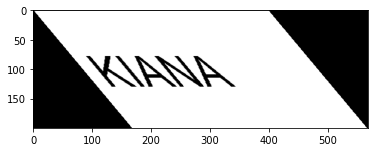

In [105]:
# plot skew
plt.imshow(results[1])